In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from pandas.api.types import is_string_dtype, is_numeric_dtype,is_categorical_dtype
%matplotlib inline

In [2]:
iris_data=load_iris()

In [3]:
scalar=StandardScaler()
filename='models/scalar.pkl'
joblib.dump(scalar,filename)
iris_feat=scalar.fit_transform(iris_data.data)

In [4]:
X_train, X_test, y_train, y_test = train_test_split( iris_data.data, iris_data.target, test_size=0.33, random_state=42)

In [5]:
xgbd=XGBClassifier(n_estimators=100,criterion='entropy', max_delta_step=6,min_samples_split=45,colsample_bytree=.4,
                  max_depth=13,max_features=11,min_child_weight=.4,gama=10)
xgbd.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, criterion='entropy',
              gama=10, gamma=0, learning_rate=0.1, max_delta_step=6,
              max_depth=13, max_features=11, min_child_weight=0.4,
              min_samples_split=45, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [6]:
y_predict  = xgbd.predict(X_test)
accuracy_score(y_test,y_predict)

0.98

In [31]:
# converting the data into a  data frame
feat=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

# RENAMING THE FEACTURES
feat.rename(columns={"sepal length (cm)":"sepal_length(cm)","sepal width (cm)":"sepal_width(cm)",
                         "petal length (cm)":"petal_length(cm)","petal width (cm)":"petal_width_(cm)"
},inplace=True)

In [32]:
feat.head(3)

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width_(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


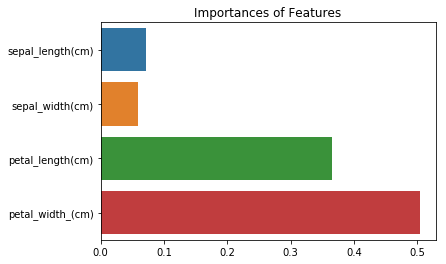

In [33]:
fea=pd.Series(xgbd.feature_importances_,index=feat.columns)
plt.title('Importances of Features')
sns.barplot(x=fea,y=fea.index)
plt.show()

[Text(0,0.5,'actual positive'), Text(0,1.5,'actual negative')]

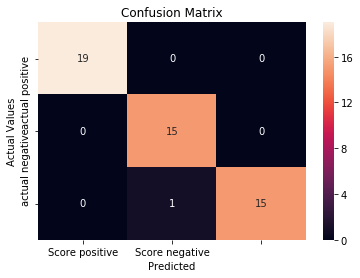

In [36]:
conf_mat = confusion_matrix(y_test,y_predict)
ax=plt.subplot()
# annot : write the data value in each cell.
# ax :  Axes in which to draw the plot
sns.heatmap(conf_mat,annot=True,ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(['Score positive','Score negative'])
ax.set_yticklabels(['actual positive','actual negative'])


In [42]:
# saving the model
filename='models/iris_model.pkl'
joblib.dump(xgbd,filename)

['models/iris_model.pkl']

In [43]:
# loading the saved model
model=joblib.load('models/iris_model.pkl')
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, criterion='entropy',
              gama=10, gamma=0, learning_rate=0.1, max_delta_step=6,
              max_depth=13, max_features=11, min_child_weight=0.4,
              min_samples_split=45, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)